### Янгаличин Олег 184-322

# Нейронная сеть

Задание: создать нейронную сеть с полносвязными слоями, обучить ее и протестировать на базе CIFAR-10.

In [1]:
# Подключим основные библиотеки
from __future__ import print_function

import math
import random
import time
from builtins import object, range


from sklearn.metrics import log_loss


import matplotlib.pyplot as plt
import numpy as np
from past.builtins import xrange

%matplotlib inline

## Класс нейронной сети

In [2]:
def ReLU(x):
    x[x<0] = 0
    return x

def ReLU_deriv(d,h):
    d[h<=0] = 0
    return d

def softmax(scores):
    return np.exp(scores)/np.sum(np.exp(scores), keepdims=True, axis=1)

def softmax_loss(scores, y):
    return -np.log(np.exp(scores[range(len(y)), y])/np.sum(np.exp(scores), axis=1))

In [3]:
class TwoLayerNet(object):
    """
    Двуслойная полносвязная нейронная сеть. Ввод размерностью N, скрытый слой размерностью H,
    и количество классов С. Обучается нейронная сеть с помощью функции потерь softmax и L2 регуляризации на матрице весов.
    В нейронной сети используется кусочно-линейная функция после первого полносвязного слоя.

    Тогда строение выглядит следующим образом:
    Входной слой -> полносвязный слой -> ReLU -> полносвязный слой -> softmax

    Выводы второго полносвязного слоя это значения для каждого класса.
    """

    def __init__(self, input_size, hidden_size, output_size, std=1e-4):
        """
        Создаем модель в исходном положении.
        Веса при инициализации приравниваются к малым случайным значениям, отклонения — к 0.
        Веса и отклонения хранятся в переменной self.params, которая является словарем со следующими ключами:

        W1: Веса первого слоя размерностью (D, H)
        b1: Отклонения первого слоя размерностью (H,)
        W2: Веса второго слоя размерностью (H, C)
        b2: Отклонения второго слоя размерностью (C,)

        Ввод:
        - input_size: Размерность D входных данных.
        - hidden_size: Число нейронов H в скрытом слое.
        - output_size: Количество классов C.
        """
        
        self.params = {}
        self.params['W1'] = std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def loss(self, X, y=None, reg=0.0):
        """
        Расчет потерь и градиентов для двухслойной полносвязной нейронной сети.

        Ввод:
        - X: Входные данные размерностью (N, D). Каждый X[i] изображение для обучения.
        - y: Вектор меток классов для обучения. Каждый y[i] это метка от X[i]
          y[i] - целое цисло в диапазоне 0 <= y[i] < C. Параметр опционален.
          если он не передается, то возвращаются только оценки классов,
          в другом случае — потери и градиенты.
        - reg: степень регуляризации.

        Вывод:
        если y None, передается матрица оценок классов размерностью (N, C) где scores[i, c] это оценка для класса с для X[i].

        в другом случае возвращается кортеж:
        - loss: Потери (потери данных and потери регуляризации) для этого набора изображений для обучения.
        - grads: словарь, связывающий параметры и их градиенты соответственно функции потерь; ключи те же как у self.params.
            """
            
        # Забираем переменные из словаря
        
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape
        
        # Проход в прямом направлении
        scores = None
        
        # Задание: написать код для прохождения в прямом направлении. Вычисляем оценки для классов.
        # Результат хранить в переменной scores массив размерностью (N, C).
        # ***Начало вашего кода***
        
        """
        VH (value hidden) - значение взвещенной суммы на скрытом слое (первый полносвязный слой)
        AH (activation hidden) - значение функции активации от взвещенной суммы на скытом слое (ReLU)
        
        Scores (VO) (value out) - значение взвещенной суммы на выходном слое (второй полносвязный слой)
        Probs (AO) (activation out) - значение функции активации от взвещенной суммы на выходном слое (softmax)
        
        """
        VH = np.dot(X, W1) + b1     
        AH = ReLU(VH)
        
        scores = np.dot(AH,W2) + b2
        probs = softmax(scores)
         # ***Конец вашего кода***

        # Если нет меток классов, то выходим
        if y is None:
            return scores

       # Рассчитываем потери
        loss = None
        
        # Задание:  завершить проход в прямом направлении, рассчитав потери.
        # Включает потери данных и L2 регуляризации для W1 и W2.
        # Результат хранить в переменной loss (скалярная).
        # Использовать Softmax.
        # ***Начало вашего кода***
        
        train_cost = softmax_loss(scores, y)
        l2_cost = reg*0.5* np.sum(W1**2) + reg*0.5* np.sum(W2**2)
        loss = np.sum(train_cost)/len(y) + l2_cost

        #**Конец вашего кода***
        
         # Проход в обратном направлении: рассчет градиентов
        grads = {}
        
        # Задание: написать код для прохода в обратном направлении, рассчитывая производные для весов и отклонений.
        # Результаты хранить в словаре grads. Например, grads['W1'] хранит градиет W1.
        # ***Начало вашего кода***

        #############################
        # grads['W2'] = (d_Loss/d_W2) = (d_Loss / d_probs) * (d_probs / d_scores) * (d_scores / d_W2)
        # Положим что [(d_Loss / d_probs) * (d_probs / d_scores)] = y_pred - y_true
        # тогда (d_Loss/d_W2) = (probs - y_true) * (d_scores / d_W2) = (probs - y_true) * (d([AH * W2] + b2) / d(W2)) =
        # = (probs - y_true) * AH => (probs - y_true) * AH + l2_reg
        #############################
        
        dloss_dscores = probs
        dloss_dscores[range(len(y)), y] -= 1
        dloss_dscores /= len(y)

        grads['W2'] = np.dot(AH.T, dloss_dscores) + reg*W2
        
        #############################
        # для grads['b2'] => :  (d_Loss/d_b2) = (d_Loss / d_probs) * (d_probs / d_scores) * (d_scores / d_b2) =>
        # (d_scores / d_b2) == (d([AH * W2] + b2) / d(b2)) = 1 =>
        # (d_Loss/d_b2) = (d_Loss / d_probs) * (d_probs / d_scores) * 1 = probs - y_true
        #############################
        
        grads['b2'] = np.sum(dloss_dscores, axis=0)
        
        #############################
        # grads['W1'] = (d_Loss/d_W1) = (d_Loss / d_probs) * (d_probs / d_scores) * (d_scores / d_AH) * 
        # *(d_AH / d_VH) * (d_VH / d_W1)
        # (d_Loss / d_probs) * (d_probs / d_scores) = (probs - y_true)
        # (d_scores / d_AH) = (d([AH * W2] + b2) / d(AH)) = W2
        # (d_AH / d_VH) = d(ReLU(VH)) / d_VH = ReLU_deriv(VH)
        # (d_VH / d_W1) = (d([X * W1] + b1) / d(W1)) = X    =>
        # (d_Loss/d_W1) = (d_probs - y_true) * W2 * ReLU_deriv(VH) * X
        #############################

        dloss_dAH = np.dot(dloss_dscores, W2.T)
        
        dloss_dVH = ReLU_deriv(dloss_dAH, AH)
        
        grads['W1'] = np.dot(X.T, dloss_dVH) + reg*W1
        
        #############################
        # для grads['b1'] => : (d_Loss/d_b1) = (d_Loss / d_probs) * (d_probs / d_scores) * (d_scores / d_AH) *
        # * (d_AH / d_VH) * (d_VH / d_b1)
        # = (d_probs - y_true) * W2 * ReLU_der(VH) * [(d_VH / d_b1) == 1] = (d_probs - y_true) * W2 * ReLU_der(VH) = >
        # (d_Loss/d_b1) = d_Loss / d_AH
        #############################
        
        grads['b1'] = np.sum(dloss_dAH, axis=0)
        # ***Конец вашего кода***
        
        return loss, grads

    def train(self, X, y, X_val, y_val,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=1e-5, num_iters=100,batch_size=200, verbose=False):
        
        """
        Обучение сети через стохастический градиентный спуск.

        Вводы:
        - X: Массив numpy размерности (N, D) данные для обучения.
        - y: Массив numpy размерности (N,) метки классов для обучения;
        - X_val: Массив numpy размерности (N_val, D) проверочные данные.
        - y_val: Массив numpy размерности (N_val,) метки классов для проверки.
        - learning_rate: Скаляр скорость обучения для оптимизации.
        - learning_rate_decay: Скаляр для снижения скорости обучения после каждой эпохи.
        - reg: Скаляр со степенью регуляризации.
        - num_iters: Число иттераций для оптимизации.
        - batch_size: Число обучающих изображений для каждого шага.
        - verbose: 	логическое значение; если истина, то выводить прогресс во время обучения.
        """
      
        num_train = X.shape[0]
        
        # !!!
        #iterations_per_epoch = np.floor(max(num_train / batch_size, 1)) #np.floor
        iterations_per_epoch = max(num_train / batch_size, 1)
        # !!!
        
        # Использовать STD для оптимизации параметров в self.model
        loss_history = []
        train_acc_history = []
        val_acc_history = []
        
        for it in range(num_iters):
            
            #Задание:
            # Создать случайные минивыборки из обучающих данных и их меток.
            # Хранить в X_batch, y_batch соответственно

            # ***Начало вашего кода***
            X_batch = None
            y_batch = None

            shuffle = np.arange(num_train)
            np.random.shuffle(shuffle)
            shuffle = shuffle[0:batch_size-1]
            X_batch = X[shuffle, :]
            y_batch = y[shuffle]

#             idx = np.random.RandomState(seed=it).permutation(X.shape[0])
#             X_batch ,y_batch = X[idx], y[idx]
#             X_batch ,y_batch = X_batch[:batch_size], y_batch[:batch_size]
            
            # ***Конец вашего кода***
            # Рассчитать потери и градиенты используя текущую минивыборку.
            loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
            loss_history.append(loss)
            
            # Задание: используя стохастический градиентый спуск и градиенты из словаря grads, обновите веса сети.

            # ***Начало вашего кода***

            self.params['W1'] += -learning_rate*grads['W1']
            self.params['W2'] += -learning_rate*grads['W2']
            self.params['b1'] += -learning_rate*grads['b1']
            self.params['b2'] += -learning_rate*grads['b2']

            if verbose and it % 100 == 0:
                print ('iteration %d / %d: loss %f' % (it, num_iters, loss))
                
            #print(it % iterations_per_epoch)
            if it % iterations_per_epoch == 0:
                
                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_history.append(train_acc)
                val_acc_history.append(val_acc)

                learning_rate *= learning_rate_decay

        return {
          'loss_history': loss_history,
          'train_acc_history': train_acc_history,
          'val_acc_history': val_acc_history,
        }

    def predict(self, X):
        
        y_pred = None

        VH = np.dot(X, self.params['W1']) + self.params['b1']
        AH = ReLU(VH)
        scores = np.dot(AH, self.params['W2']) + self.params['b2']
        y_pred = np.argmax(scores, axis=1)

        return y_pred

In [363]:
# Создадим небольшую нейронную сеть и базу данных, чтобы проверить написанный код.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()
n,d = X.shape

## Проход в прямом направлении: оценки классов

In [364]:
scores = net.loss(X)
print('Ваши оценки классов:')
print(scores)
print()
print('Истинные значения:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# Разница должна быть невелика.
print('Разница между вашими оценками и истинными значениями:')
print(np.sum(np.abs(scores - correct_scores)))

Ваши оценки классов:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Истинные значения:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Разница между вашими оценками и истинными значениями:
3.6802720496109664e-08


## Проход в прямом направлении: потери

In [365]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# Разница должна быть невелика.
print('Разница между вашими потерями и истинным значением:')
print(np.sum(np.abs(loss - correct_loss)))

Разница между вашими потерями и истинным значением:
0.018965419606062905


## Проход в обратном направлении

In [366]:
def eval_numerical_gradient(f, x, verbose=True, h=0.00001):
    """
    Функция для расчета численного градиента функции f в точке x
    - f — функция с одной переменной
    - x точка (массив numpy), в которой считается градиент
    """

    fx = f(x)
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h
        fxph = f(x)
        x[ix] = oldval - h
        fxmh = f(x)
        x[ix] = oldval

        grad[ix] = (fxph - fxmh) / (2 * h) #(fxph[0] - fxmh[0]) / (2 * h)
        if verbose:
            print(ix, grad[ix])
        it.iternext()

    return grad

# Используя численный градиент проверьте ваше решение для прохода в обратном направлении.
# Если все верно, то разница между численным и аналитическим градиентами должна быть меньше 1e-8 для W1, W2, b1 и b2.

def rel_error(x, y):
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [367]:
loss, grads = net.loss(X, y, reg=0.05)
lists = []
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.5)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    lists.append(param_grad_num)
    print('%s максимальная относительная ошибка: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 максимальная относительная ошибка: 1.000000e+00
b2 максимальная относительная ошибка: 3.865028e-11
W1 максимальная относительная ошибка: 1.000000e+00
b1 максимальная относительная ошибка: 2.738422e-09


In [368]:
#lists

In [369]:
#grads

## Обучение сети

Для обучения сети используется стохастический градиентный спуск, аналогичный тому, что мы использовали в предыдущих заданиях. Сначала мы проверим реализацию на малой сети.

iteration 0 / 200: loss 1.191515
iteration 100 / 200: loss 0.059002
Итоговые потери при обучении:  0.02673383925061447


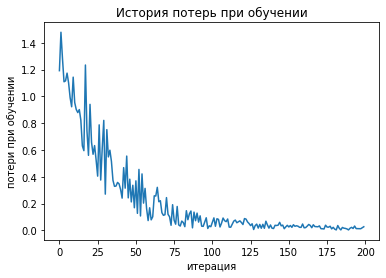

In [370]:
#################################################################################
# работает кооректно при iterations_per_epoch = 1 или других маленьких значениях#
############## либо np.floor(max(num_train / batch_size, 1))#####################
#################################################################################

net = init_toy_model()
stats = net.train(X,y,X,y,
            learning_rate=1e-2, reg=5e-6,
            num_iters=200, batch_size = 3, verbose=True)

print('Итоговые потери при обучении: ', stats['loss_history'][-1])

# график истории потерь
plt.plot(stats['loss_history'])
plt.xlabel('итерация')
plt.ylabel('потери при обучении')
plt.title('История потерь при обучении')
plt.show()

## Загрузка базы CIFAR-10

In [371]:
# # Определим функции для загрузки базы CIFAR-10

# from six.moves import cPickle as pickle
# import os
# import platform

# def load_pickle(f):
#     version = platform.python_version_tuple()
#     if version[0] == '2':
#         return  pickle.load(f)
#     elif version[0] == '3':
#         return  pickle.load(f, encoding='latin1')
#     raise ValueError("Неверная версия Python: {}".format(version))

# def load_CIFAR_batch(filename):
#     with open(filename, 'rb') as f:
#         datadict = load_pickle(f)
#         X = datadict['data']
#         Y = datadict['labels']
#         X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
#         Y = np.array(Y)
#         return X, Y

# def load_CIFAR10(ROOT):
#     xs = []
#     ys = []
#     for b in range(1,6):
#         f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
#         X, Y = load_CIFAR_batch(f)
#         xs.append(X)
#         ys.append(Y)
#     Xtr = np.concatenate(xs)
#     Ytr = np.concatenate(ys)
#     del X, Y
#     Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
#     return Xtr, Ytr, Xte, Yte

In [372]:
# def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):

#     # Путь до данных необходимо указать свой    
#     cifar10_dir = '...'
    
#     # Сброс переменных для избежания многократной загрузки базы в память
#     try:
#         del X_train, y_train
#         del X_test, y_test
#         print('Сброс предыдущих данных.')
#     except:
#         pass

#     X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
#     # Подвыбоки
#     mask = list(range(num_training, num_training + num_validation))
#     X_val = X_train[mask]
#     y_val = y_train[mask]
#     mask = list(range(num_training))
#     X_train = X_train[mask]
#     y_train = y_train[mask]
#     mask = list(range(num_test))
#     X_test = X_test[mask]
#     y_test = y_test[mask]
    
#     # Нормализация данных: вычетаем среднее изображение
#     mean_image = np.mean(X_train, axis=0)
#     X_train -= mean_image
#     X_val -= mean_image
#     X_test -= mean_image
    
#     # Преобразование изображений в ряды
#     X_train = X_train.reshape(num_training, -1)
#     X_val = X_val.reshape(num_validation, -1)
#     X_test = X_test.reshape(num_test, -1)
    
#     return X_train, y_train, X_val, y_val, X_test, y_test


# # Используем полученную функцию.
# X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

# print('Размерность изображений для обучения: ', X_train.shape)
# print('Размерность классов для обучения: ', y_train.shape)
# print('Размерность изображений для проверки: ', X_val.shape)
# print('Размерность классов для проверки: ', y_val.shape)
# print('Размерность изображений для тестирования: ', X_test.shape)
# print('Размерность классов для тестирования: ', y_test.shape)

In [4]:
from keras.datasets import cifar10
(X, y), (test_data, test_labels) = cifar10.load_data()

Using TensorFlow backend.


In [5]:
X_train = X[:49000]
y_train = y[:49000]
X_val = X[49000:]
y_val = y[49000:]
X_test = test_data[:1000]
y_test = test_labels[:1000]

X_train = X_train.reshape(X_train.shape[0],-1)
X_val = X_val.reshape(X_val.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)


y_train = np.array([a[0] for a in y_train])
y_val = np.array([a[0] for a in y_val])
y_test = np.array([a[0] for a in y_test])

print('Размерность изображений для обучения: ', X_train.shape)
print('Размерность классов для обучения: ', y_train.shape)
print('Размерность изображений для проверки: ', X_val.shape)
print('Размерность классов для проверки: ', y_val.shape)
print('Размерность изображений для тестирования: ', X_test.shape)
print('Размерность классов для тестирования: ', y_test.shape)

Размерность изображений для обучения:  (49000, 3072)
Размерность классов для обучения:  (49000,)
Размерность изображений для проверки:  (1000, 3072)
Размерность классов для проверки:  (1000,)
Размерность изображений для тестирования:  (1000, 3072)
Размерность классов для тестирования:  (1000,)


## Обучение сети

Скорость обучения будет снижаться, помере оптимизации сети. После каждой эпохи, скорость обучения умножается на коэффициент снижения.

In [6]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
#val_acc = ([np.argmax(a) for a in net.predict(X_val)] == y_val).mean()
val_acc = (net.predict(X_val) == y_val).mean()
print('Точность на проверочной выборке: ', val_acc)

iteration 0 / 1000: loss 2.302763
iteration 100 / 1000: loss 2.300068
iteration 200 / 1000: loss 2.259947
iteration 300 / 1000: loss 2.158770
iteration 400 / 1000: loss 2.066065
iteration 500 / 1000: loss 2.037260
iteration 600 / 1000: loss 1.988725
iteration 700 / 1000: loss 1.956952
iteration 800 / 1000: loss 1.942657
iteration 900 / 1000: loss 1.890724
Точность на проверочной выборке:  0.326


In [7]:
#stats

## Контроль обучения сети

С исходными параметрами точность на проверочной выборке составит около 0.29.
Один из путей чтобы увидеть проблему это построить график потерь и точности на обучающей и проверочной выборках во время оптимизации.

Другой — визуализировать веса первого слоя, так как при работе с визуальными данными, там есть явная структура.

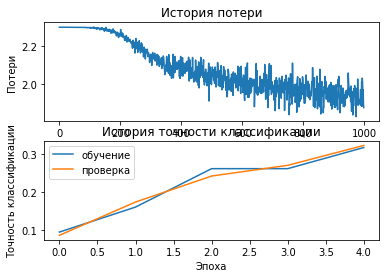

In [8]:
# Графики функции потерь и точностей на обучающей и проверочной выборках.
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('История потери')
plt.xlabel('Итерация')
plt.ylabel('Потери')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='обучение')
plt.plot(stats['val_acc_history'], label='проверка')
plt.title('История точности классификации')
plt.xlabel('Эпоха')
plt.ylabel('Точность классификации')
plt.legend()
plt.show()

# Подбор гиперпараметров

In [460]:
best_net = None # сохраните лучший экземпляр вашей сети

# Задание: подберите гиперпараметры сети используя проверочную выборку. 

# ***Начало вашего кода***

input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10

batch_size_arr =[200] #[100, 200 ,500, 1000]
start_lr_array =  10.0**np.random.uniform(-5,-1 ,5) #[1e-2, 1e-3, 1e-4, 1e-5]
lr_decay_array = [1, 0.99, 0.95, 0.9, 0.8]
reg_array =10.0**np.random.uniform(-2, 0 ,5) #[0.05, 0.1, 0.175, 0.25]

best_batch_size = None
best_lr = None
best_lrd = None
best_reg = None
val_min = 0
k=0

for btch in batch_size_arr:
    for lr in start_lr_array:
        for lrd in lr_decay_array:
            for reg_coef in reg_array:
                net = TwoLayerNet(input_size, hidden_size, num_classes)
                stats = net.train(X_train, y_train, X_val, y_val,
                                    num_iters=1000, batch_size=btch,
                                    learning_rate=lr, learning_rate_decay=lrd,
                                    reg=reg_coef, verbose=False)
                val_acc = (net.predict(X_val) == y_val).mean()
                print(f'iteration {k} out of {len(batch_size_arr) * len(start_lr_array) * len(lr_decay_array) \
                            * len(reg_array)}')
                print(f'val acc {val_acc}')
                if val_acc >= val_min:
                    best_batch_size = btch
                    best_lr = lr
                    best_lrd = lrd
                    best_reg = reg_coef
                    val_min = val_acc
                    print(f'best acc {val_min}')
                print('\r')
                k +=1
                    

# ***Конец вашего кода***

iteration 0 out of 256
val acc 0.119
best acc 0.119

iteration 1 out of 256
val acc 0.078

iteration 2 out of 256
val acc 0.087



C:\Pyhton\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Pyhton\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
C:\Pyhton\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Pyhton\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
C:\Pyhton\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less_equal
  


iteration 3 out of 256
val acc 0.087

iteration 4 out of 256
val acc 0.087

iteration 5 out of 256
val acc 0.087

iteration 6 out of 256
val acc 0.102

iteration 7 out of 256
val acc 0.102

iteration 8 out of 256
val acc 0.119
best acc 0.119

iteration 9 out of 256
val acc 0.079

iteration 10 out of 256
val acc 0.078

iteration 11 out of 256
val acc 0.105

iteration 12 out of 256
val acc 0.078

iteration 13 out of 256
val acc 0.079

iteration 14 out of 256
val acc 0.098

iteration 15 out of 256
val acc 0.078

iteration 16 out of 256
val acc 0.078

iteration 17 out of 256
val acc 0.102

iteration 18 out of 256
val acc 0.079

iteration 19 out of 256
val acc 0.098

iteration 20 out of 256
val acc 0.098

iteration 21 out of 256
val acc 0.087

iteration 22 out of 256
val acc 0.098

iteration 23 out of 256
val acc 0.079

iteration 24 out of 256
val acc 0.105

iteration 25 out of 256
val acc 0.347
best acc 0.347

iteration 26 out of 256
val acc 0.397
best acc 0.397

iteration 27 out of 256
va

In [461]:
print(f' best batch size = {best_batch_size}')
print(f' best start lerning rate = {best_lr}')
print(f' best lr decay  = {best_lrd}')
print(f' best regul coef  = {best_reg}')

 best batch size = 200
 best start lerning rate = 0.0006786797701262198
 best lr decay  = 0.8
 best regul coef  = 0.06909608942577926


In [13]:
best_net = TwoLayerNet(input_size, hidden_size, num_classes)
best_stats = best_net.train(X_train, y_train, X_val, y_val,
                                    num_iters=10000, batch_size=50,
                                    learning_rate=0.0006786797701262198, learning_rate_decay=0.8,
                                    reg=0.06909608942577926, verbose=False)

## Запуск на тестовой выборке

Результат должен быть выше 48%.

In [14]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Точность на тестовой выборке: ', test_acc)

Точность на тестовой выборке:  0.46
